# Data Mining and Statistics
## Session 3 - Statistics
*Peter Stikker - Haarlem, the Netherlands*

----

This notebook is somewhat different than the ones in the previous sessions. This is not to explain everything we discussed, but to show you an example on how a statistical analysis could be done.

Lets get started.

We'll need our trusted Pandas, Numpy and Pyplot

In [1]:
# pandas as pd
try:
    import pandas as pd
    print('Pandas already installed, only imported')
except:
    %pip install pandas
    import pandas as pd
    print('Pandas was not installed, installed and imported')
    
# numpy as np
try:
    import numpy as np
    print('NumPy already installed, only imported')
except:
    %pip install numpy
    import numpy as np
    print('NumPy was not installed, installed and imported')
    
# pyplot as plt
try:
    import matplotlib.pyplot as plt
    print('PyPlot already installed, only imported')
except:
    %pip install matplotlib
    import matplotlib.pyplot as plt
    print('PyPlot was not installed, installed and imported')    

Pandas already installed, only imported
NumPy already installed, only imported
PyPlot already installed, only imported


The data we'll use is stored in a file called gss2012. It is data from the general social survey from 2012, held in the USA.

Lets load the data frame.

In [2]:
gss2012_df = pd.read_csv('GSS2012.csv', low_memory=False)

# Step 0: Data Cleaning

For the purpose of the explanation we will investigate if there is anything that could be said about the marital status *mar1* and the gender (*sex*) of the respondents.

We first create a dataframe of just those two.

In [3]:
mar_gen_df = gss2012_df[['mar1', 'sex']     ]
mar_gen_df.head()

,mar1,sex
0,MARRIED,MALE
1,DIVORCED,FEMALE
2,MARRIED,FEMALE
3,SEPARATED,FEMALE
4,DIVORCED,MALE


Lets check the data types:

In [4]:
mar_gen_df.dtypes

mar1    object
sex     object
dtype: object

Hm, lets change this to categorical. We don't need to specify the categories or set an order, since both fields are nominal.
If you override a current dtype a warning will be shown, since I prefer not to see warnings if they are not relevant I can set them to 'none'.

In [5]:
pd.options.mode.chained_assignment = None  # default='warn'

mar_gen_df['mar1'] = pd.Categorical(mar_gen_df['mar1'])
mar_gen_df['sex'] = pd.Categorical(mar_gen_df['sex'])
mar_gen_df.dtypes

mar1    category
sex     category
dtype: object

Now a check for missing values:

In [6]:
mar_gen_df.isna().sum()

mar1    33
sex      0
dtype: int64

Sex does not seem to have any missing values, but marital status has 33. We could decide to remove those for our analysis.

In [7]:
mar_gen_df = mar_gen_df.dropna()
mar_gen_df.isna().sum()

mar1    0
sex     0
dtype: int64

Finally quickly check the categories:

In [8]:
print(mar_gen_df['sex'].unique())
print(mar_gen_df['mar1'].unique())

['MALE', 'FEMALE']
Categories (2, object): ['FEMALE', 'MALE']
['MARRIED', 'DIVORCED', 'SEPARATED', 'NEVER MARRIED', 'WIDOWED']
Categories (5, object): ['DIVORCED', 'MARRIED', 'NEVER MARRIED', 'SEPARATED', 'WIDOWED']


Looks good. We can begin analyzing the data.

# Step 1: Impression of the Data

To get a first impression we could generate a frequency table of each of the two variables. We've seen how to do this in the previous session.

In [9]:
mar_gen_df['sex'].value_counts()

FEMALE    1068
MALE       873
Name: sex, dtype: int64

In [10]:
mar_gen_df['mar1'].value_counts()

MARRIED          972
NEVER MARRIED    395
DIVORCED         314
WIDOWED          181
SEPARATED         79
Name: mar1, dtype: int64

However, we are analysing both various simultaniously. So a so-called cross table is more suitable:

In [11]:
mar_gen_ct = pd.crosstab(mar_gen_df['mar1'], mar_gen_df['sex'])
mar_gen_ct

sex,FEMALE,MALE
mar1,,
DIVORCED,172,142
MARRIED,516,456
NEVER MARRIED,207,188
SEPARATED,50,29
WIDOWED,123,58


It is clear that most people are Married, but we are not so much interested in which option was chosen the most (that's a single nominal variable analysis), but if there are differences between female and male.

To compare these, we can determine the percentage that was chosen for the females, and the males. Note that we look for how much percent of the females are divorced vs. the percentage of males that are divorced. We need to use the column totals to determine the percentage.

In [12]:
mar_gen_perc = mar_gen_ct.div(mar_gen_ct.sum(axis=0), axis=1)*100
mar_gen_perc

sex,FEMALE,MALE
mar1,,
DIVORCED,16.104869,16.265750
MARRIED,48.314607,52.233677
NEVER MARRIED,19.382022,21.534937
SEPARATED,4.681648,3.321879
WIDOWED,11.516854,6.643757


It appears that the Widowed category has the largest difference, quickly followed by the married category. A visualisation might help.

# Step 2: Visualisation of the Data

The difficulty here is often choosing an appropriate diagram to visualise the data. One suggestion often made for visualising two nominal variables is a Clustered Bar Chart.

This diagram is fairly easy if we already made the cross table.

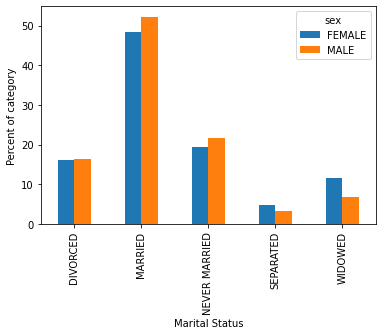

In [13]:
mar_gen_perc.plot(kind='bar')
plt.ylabel('Percent of category')
plt.xlabel('Marital Status')
plt.show()

The visualisation confirms what we already saw from the cross table. However, this might be nicer to use in the report than a bunge of number.

We notice a few differences, but are these differences also considered significant...

# Step 3a: Omnibus Test

So, we've seen that in our sample there are some differences between male and females in marital status. Not very big differences, but still. The question is now if this is sufficient evidence to say if these differences will also occur in the population, i.e. is it significant.

The statistical test we can use in this case (two nominal variables) is a **Pearson chi-square test of independence**. Sounds scary, but don't worry we'll leave all the heavy computations for this to Python.

This test is based on so-called expected values. It determines based on the totals what the counts in our cross table would have been, if gender had no influence on marital status, then compares this to the actual results. If the difference between these expected counts and observed counts is large enough, it would suggest that this assumption is wrong, so gender does influence marital status.

Okay, so how do you perform this test with Python? We can use various packages for this, but a popular package for running statistical tests is SciPy. First we install this.

In [14]:
# SciPy
try:
    import scipy.stats
    print('SciPy already installed, only imported')
except:
    !pip install scipy
    import scipy.stats
    print('SciPy was not installed, installed and imported')

SciPy already installed, only imported


Now we can use it with as parameter our cross table.

In [15]:
chiVal, pVal, df, exp = scipy.stats.chi2_contingency(mar_gen_ct)
chiVal, pVal, df, exp

(16.989749099448613,
 0.0019418339492422961,
 4,
 array([[172.77279753, 141.22720247],
        [534.82534776, 437.17465224],
        [217.34157651, 177.65842349],
        [ 43.4683153 ,  35.5316847 ],
        [ 99.59196291,  81.40803709]]))

That was hopefully easy enough, but what does all of this mean?

The first value (16.99) is the chi-square value. It is the number that indicates how big the differences are (to be fully accurate: the sum of squared differences between observed and expected divided by expected count). We don't care much for this value, but should be reported so others can verify your results.

The second value (0.0019) is what we were looking for, it is the **significance** or also known as the **p-value**. So as discussed in class, it is the probability of a result as in the sample, or more extreme, if the assumption about the population was true.
This value is below 0.05 and therefor usually considered low enough to reject the assumption. The assumption is that gender has no influence on marital status, since this is rejected we conclude that gender does have an influence.

The third value (4) is the degrees of freedom. This is an indication about the size of the table (it is the number of columns - 1, multiplied with the number of rows - 1). As the first value, not so interesting for us, but should be reported.

The last part is an array showing those earlier mentioned expected counts, i.e. the counts expected if gender had no influence on marital status. We don't report these but we do have to check something here. The chi-square test is only allowed to be used if the lowest value of these is at least 1, and if at least 20% of those values are 5 or higher. In this case we can see that all values are above 5, so this is fine. If it wouldn't be we would have to use another test (a Fisher exact test).

So we could now report:

   Gender and marital status showed to have a significant association, χ<sup>2</sup>(4, N = 1941) = 16.99, p = .002.

All the values were in the output. 

We now have shown that gender has an influence on marital status, but have not shown which marital status is then affected. We need to perform another test to find this out...

# Step 3b: Post-Hoc Test

As we finished the previous chapter we need to do another test to pinpoint the categories where there is a difference between male and females. Since we do this test after we have done another test, it is called a **post-hoc test**.

One of these post-hoc tests we can perform is a test on the so-called residuals (or adjusted standardized residuals). The residual is the difference between those observed and expected counts. 

Unfortunately I'm not aware of any package that can run this test, but no worries here is a function that will do this.

In [16]:
def post_hoc_chi2(crosstable, var1, var2):
    col_names = crosstable.columns
    col_totals = crosstable.sum()
    n_cols = len(col_totals)
    row_totals = crosstable.sum(axis=1)
    n_rows = len(row_totals)
    n = sum(row_totals)

    ph_results = pd.DataFrame(columns=[var1, var2, 'Adj. Res.'])
    for i in range(n_rows):
        for j in range(n_cols):
            adj_res = (crosstable.iloc[i,j] - exp[i,j]) / (exp[i,j]*(1-row_totals[i]/n)*(1-col_totals[j]/n))**0.5
            ph_results = ph_results.append({var1:crosstable.index[i], var2:crosstable.columns[j], 'Adj. Res.':adj_res}, ignore_index=True)

    ph_results['Sig.'] = 2*(1-scipy.stats.norm.cdf(abs(ph_results['Adj. Res.'])))   
    ph_results['Adj. Sig.'] = ph_results.shape[0]*ph_results['Sig.']
    ph_results.loc[ph_results['Adj. Sig.']> 1, 'Adj. Sig.'] = 1
    return ph_results

Now to run the function:

In [17]:
post_hoc_chi2(mar_gen_ct, 'mar1', 'sex')

,mar1,sex,Adj. Res.,Sig.,Adj. Sig.
0,DIVORCED,FEMALE,-0.095753,0.923717,1.000000
1,DIVORCED,MALE,0.095753,0.923717,1.000000
2,MARRIED,FEMALE,-1.717883,0.085818,0.858180
3,MARRIED,MALE,1.717883,0.085818,0.858180
4,NEVER MARRIED,FEMALE,-1.172004,0.241196,1.000000
5,NEVER MARRIED,MALE,1.172004,0.241196,1.000000
6,SEPARATED,FEMALE,1.508229,0.131496,1.000000
7,SEPARATED,MALE,-1.508229,0.131496,1.000000
8,WIDOWED,FEMALE,3.672949,0.000240,0.002398
9,WIDOWED,MALE,-3.672949,0.000240,0.002398


If you are interested in how this function was created, have a look at <a href="https://youtu.be/-S8EJEYNFIc">this video</a>.

So what do we get? For each cell we see a familiar *sig* value, but also an *Adj. Sig.*. This last one is the one we are after. The 'Adj' is short for 'adjusted'. Because we performed 9 tests, we need to reduce the risk of a so-called type I error. Each time we perform a test and use 0.05 as the threshold, we take a risk of 5% to make the wrong decision. Now these risks actually start accumulating, and to account for this the normal significance has to be adjusted. This adjustment can be done in different ways, but a popular version is the Bonferroni method, which was used to calculated the Adj. Sig.'.

As usual if this is below 0.05 we reject the assumption about the population. In this test this is that the Observed values equal the Expected for that particular cell. As you can see, only for Widowed-Female and Widowed-Male this is below 0.05.

So, we can conclude that the percentage of widowed females is significantly different from the percentage of widowed males. Yes, we also established something similar from the visualisation, but that was only about the sample, this applies to the population.

So, there is a difference, but could we claim this as a big difference? For that we need one more step...

# Step 4: Effect Size

With big data, even small differences can become significant. This is why APA recommends to also report an effect size. This simplistically put gives an indication of the strength of the influence or association.

A popular effect size for the chi-square test is Cramer's V. It is calculated using the following formula:

\begin{equation*}
V = \sqrt{\frac{\chi^2}{n\times\left(\text{MIN}\left(r, c\right) - 1\right)}}
\end{equation*}

Where $r$ is the number of rows, $c$ the number of columns, and $n$ the total sample size.

Unfortunately Pandas nor SciPy has a function to calculate this directly, but the formula is not as complex as you might think. With the output from the chi-square test earlier, we already have the chi-square value, the others are fairly easy obtainable.

In [18]:
r = len(mar_gen_ct.index)
c = len(mar_gen_ct.columns)
n = mar_gen_ct.to_numpy().sum()

r, c, n

(5, 2, 1941)

Now we can simply fill out the formula:

In [19]:
V = (chiVal / (n*(min(r,c) - 1)))**0.5
V

0.09355795383688979

Great, but what does this mean? This value is between 0 and 1. The closer to 0 the weaker the association, the closer to 1 the stronger. 

Although sometimes frowned upon there are some rules of thumb but they can vary per field and author. Here's one:

|df*|negligible|small|medium|large|
|:---|:--------|:--------|:--------|:--------|
|1|0 < .10|.10 < .30|.30 < .50|.50 or more|
|2|0 < .07|.07 < .21|.21 < .35|.35 or more|
|3|0 < .06|.06 < .17|.17 < .29|.29 or more|
|4|0 < .05|.05 < .15|.15 < .25|.25 or more|
|5|0 < .05|.05 < .13|.13 < .22|.22 or more|

the df* is the degrees of freedom, which for Cramer's V is the minimum of either the number of rows - 1, or the number of columns - 1 (whichever is smaller).

In the example we only had two columns, and five rows. The df* is therefor 2 - 1 = 1. Our Cramer's V was 0.09 which indicates it falls in the 'negligible' category.

So, although there is an influence of gender on marital status, it is not a very big influence.

We could conclude our inferential statistical analysis with something like:

Gender and marital status showed to have a significant but negligible association, *χ<sup>2</sup>*(4, *N* = 1941) = 16.99, *p* < .001, *V* = .09. A pairwise z-test post hoc analysis with Bonferroni correction revealed that only for widowed there was a significant difference between the male and female percentage, *p* < .05.

# Step 5: Report the Results

Opinions of course vary on what a good report looks like, but I always recommend to use the following structure:


* Introduce the analysis you are about to perform.
* Show a visualisation
* Describe what you notice or like to focus on from the visualisation
* Show the inferential statistical analysis results to test what you noticed
* Draw a final conclusion.

If you are curious on what that might look like for the analysis we performed in this document, have a look at: https://peterstatistics.com/CrashCourse/3-TwoVarUnpair/NomNom/NomNom-3-Reporting.html


# What Now?

In this notebook we only covered the analysis you could perform if you have two nominal variables. There are plenty of other combinations with two variables (nominal vs. ordinal, ordinal vs. ordinal, etc.).

If the two variables were also measured on a same scale (and not only measurement level) you could also look into the so-called paired tests (often used in a 'before and after study'). 

Also with already one variable you can perform tests, and of course also if you have three or more at once.

The question then arises each time: Which visualisation? Which test? Which effect size? In my opinion you don't need to know all of these tests by heart. Others have made selections for you and even placed their suggestions online.

A colleague of mine once said "never miss an oppertunity to promote yourself", so my suggestion is to use: https://PeterStatistics.com. On this site you find on top a menu with sub-menus covering every possible scenario with one or two variables (and a few with 3 or more paired variables).

For example the analysis we performed here is one involving two variables, and since the scales were different two unpaired variables. If you click on 'Two variables - unpaired' and then 'Nominal vs. Nominal', you get to a page with on the left-hand side a menu with the steps we discussed here. In each of those chapters an explanation is given and YouTube videos are shown (by clicking on the 'Click here to see...') for various software programs, including Python.

# Exercises

**Exercise 1**

With a data set of your own (you can use any data set that was not used in this course), pick one variable and analyse it using the steps described on https://PeterStatistics.com.

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean, stdev

# Step 0; data cleaning
# First, lets read the data chosen 
survey_df = pd.read_csv('patient-satisfaction.csv', low_memory=False)
scores = survey_df['Value']

# Drop missing values
scores = scores.dropna()

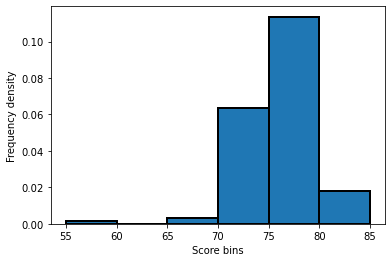

So after setting up the histogram, we have a clear view on the scores that occur with a frequency density. 
    What might be interesting to see is that there is one bin that has a score between 55 and 60, which looks very low compared to the other score bins.


In [100]:
# 1b Visualize the the scores using a histogram
plt.hist(scores, edgecolor='black', lw=2, bins = [55, 60, 65, 70, 75, 80, 85], density=True)
plt.xlabel('Score bins')
plt.ylabel('Frequency density')
plt.show()

In [110]:
# 1c calculate the mean and the standard deviation 
m = mean(scores)
std = stdev(scores)
print(m)
print(std)


75.91666666666667
3.280433937658008


In [123]:
# 2a population mean
from scipy.stats import ttest_1samp, sem, t  

# do a one sample t test with hyp a mean 
hyp_mean = 75
ttest_1samp(scores, hyp_mean)

Ttest_1sampResult(statistic=3.2104588555862343, pvalue=0.0016671318802429964)

In [124]:
# verify t-value with Standard error 
SE = sem(scores)
tval = (m - hyp_mean)/SE
print(tval, SE)

3.2104588555862343 0.28552512519251294


In [147]:
# Calculate the t-distribution with the df = n-1 so that we can get the cumulative distribution.
df = len(scores) - 1
t.cdf(tval, df) * 2


131

In [148]:
# Calculate the confidence interval
conf_level = 0.95
t.interval(conf_level, df, loc=m, scale=SE)

(75.35182986009772, 76.48150347323562)

In [145]:
# Get the effect size using cohens d
diff = m - hyp_mean
cohens_d = diff / std
d = cohens_d * 2**0.05
cohen_d = abs(d)
cohen_d

132

Peter Stikker was interested in the scores that the patients gave after their hospital stay. He believed that the average score was 75. 
    To investigate this, below figure shows the results from the survey. 


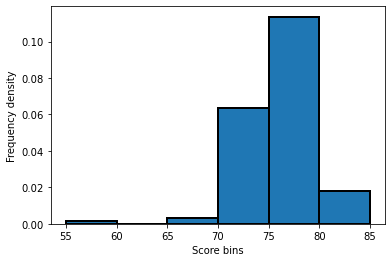

As can be seen in the figure, there seems to be about a very small group that gave a low score for their hospital stay. While the peek scores are around 75-80.
The mean score of the respondents was 75.92, 95% CI [75.4, 76.5], with a little variation between the respondents (SD 3.28)

The claim that the average score is 75 can be rejected, t(131) = 3.21, p < .05, with a small effect size (d = .29)

Altough the average might not be 75, the difference with the sample average was nog very high.


In [150]:
# Conclusion/Report

# Introduction
print(
    """Peter Stikker was interested in the scores that the patients gave after their hospital stay. He believed that the average score was 75. 
    To investigate this, below figure shows the results from the survey. """
)
plt.hist(scores, edgecolor='black', lw=2, bins = [55, 60, 65, 70, 75, 80, 85], density=True)
plt.xlabel('Score bins')
plt.ylabel('Frequency density')
plt.show()

# Description of noteworthy things
print("""As can be seen in the figure, there seems to be about a very small group that gave a low score for their hospital stay. While the peek scores are around 75-80.
The mean score of the respondents was 75.92, 95% CI [75.4, 76.5], with a little variation between the respondents (SD 3.28)""")

# Statiscal analysis
print()
print("The claim that the average score is 75 can be rejected, t(131) = 3.21, p < .05, with a small effect size (d = .29)")

# Final conclusion
print()
print("Altough the average might not be 75, the difference with the sample average was not very high.")

**Exercise 2**

With a data set of your own (you can use any data set that was not used in this course), pick two non-nominal variables and analyse it using the steps described on https://PeterStatistics.com. So a nominal and ordinal, or nominal and scale, or two ordinal, an ordinal and scale, or two scale variables.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean, stdev

# Step 0; data cleaning
# First, lets read the data chosen 
survey_df = pd.read_csv('hr_engagement.csv', low_memory=False)
survey_df.head()


,Year,Status,Role,Department,Director,Manager,Supervisor,Lead,Staff,Person_ID,Question,Answer_Numeric,Answer_Text
0,2019 May,Complete,Lead,Assessor-Treasurer's Office,False,False,False,True,False,NaN,01. I know what is expected of me at work.,4,Strongly Agree
1,2019 May,Complete,Lead,Assessor-Treasurer's Office,False,False,False,True,False,NaN,01. I know what is expected of me at work.,3,Agree
2,2019 May,Complete,Lead,Assessor-Treasurer's Office,False,False,False,True,False,NaN,01. I know what is expected of me at work.,3,Agree
3,2019 May,Complete,Lead,Assessor-Treasurer's Office,False,False,False,True,False,NaN,01. I know what is expected of me at work.,4,Strongly Agree
4,2019 May,Complete,Manager,Assessor-Treasurer's Office,False,True,False,False,False,NaN,01. I know what is expected of me at work.,1,Strongly Disagree


In [9]:
# Pick a specific question from the survey to do a statistical analysis on
# Statement 11 is chosen which is 'I have a best friend at work'.
complete_stmt = survey_df[survey_df['Question'] == '11. I have a best friend at work.']
a_r_df = complete_stmt[['Answer_Text', 'Role']]
a_r_df.head()

,Answer_Text,Role
37240,Strongly Agree,Lead
37241,Not Applicable,Lead
37242,Not Applicable,Lead
37243,Disagree,Lead
37244,Strongly Disagree,Manager


In [10]:
# It looks like we are dealing with ordinal and nominal variables 
# So change them to categorical and order the ordinal variable
a_r_df['Answer_Text'] = pd.Categorical(a_r_df['Answer_Text'], categories=['Strongly Disagree', 'Disagree', 'Not Applicable', 'Agree', 'Strongly Agree'], ordered=True)
a_r_df['Role'] = pd.Categorical(a_r_df['Role'])

a_r_df.dtypes

C:\Users\ruben\AppData\Local\Temp/ipykernel_15580/1747735352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_r_df['Answer_Text'] = pd.Categorical(a_r_df['Answer_Text'], categories=['Strongly Disagree', 'Disagree', 'Not Applicable', 'Agree', 'Strongly Agree'], ordered=True)
C:\Users\ruben\AppData\Local\Temp/ipykernel_15580/1747735352.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_r_df['Role'] = pd.Categorical(a_r_df['Role'])


Answer_Text    category
Role           category
dtype: object

In [17]:
print(a_r_df['Answer_Text'].value_counts().sort_index())
print()
print(a_r_df['Role'].value_counts().sort_index())

Strongly Disagree     374
Disagree             1237
Not Applicable        417
Agree                1165
Strongly Agree        501
Name: Answer_Text, dtype: int64

Director          37
Lead             400
Manager          273
Staff           1600
Staff Member     933
Supervisor       458
Name: Role, dtype: int64


In [18]:
# Drop missing values
a_r_df = a_r_df.dropna()
a_r_df.isna().sum()

Answer_Text    0
Role           0
dtype: int64

In [20]:
# Part 1; Impression of the data
# Get an impression by making a crosstable
ct = pd.crosstab(a_r_df['Answer_Text'], a_r_df['Role'])
ct

Role,Director,Lead,Manager,Staff,Staff Member,Supervisor
Answer_Text,,,,,,
Strongly Disagree,4,43,27,170,82,48
Disagree,9,132,74,556,311,155
Not Applicable,8,49,43,164,114,38
Agree,8,118,86,502,298,153
Strongly Agree,8,58,37,206,128,64


In [23]:
# It looks like we have 

ardf_ct_perc = ct.div(ct.sum(axis=0), axis=1)*100
ardf_ct_perc

Role,Director,Lead,Manager,Staff,Staff Member,Supervisor
Answer_Text,,,,,,
Strongly Disagree,10.810811,10.75,10.112360,10.638298,8.788853,10.480349
Disagree,24.324324,33.00,27.715356,34.793492,33.333333,33.842795
Not Applicable,21.621622,12.25,16.104869,10.262829,12.218650,8.296943
Agree,21.621622,29.50,32.209738,31.414268,31.939979,33.406114
Strongly Agree,21.621622,14.50,13.857678,12.891114,13.719185,13.973799


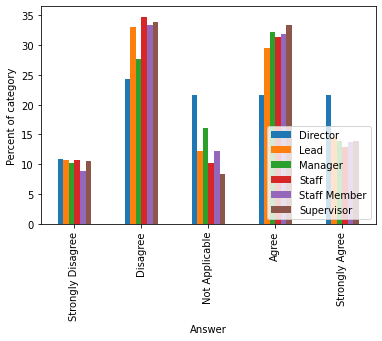

In [32]:
ardf_ct_perc.plot(kind='bar')
plt.ylabel('Percent of category')
plt.xlabel('Answer')
plt.legend(loc=4)
plt.show()

**Exercise 3**

Create a small 'report' of your results of exercise 1 and 2. Each will probably be just one or two pages, so between two and four pages in total. Post your report on the discussion forum on Moodle.